<a href="https://colab.research.google.com/github/IndraP24/Full-Stack-Deep-Learning-Spring21/blob/main/Deep%20Learning%20Fundamentals/Part%201%20Basics%20%7C%20Coding%20a%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

```
# This is treated as a code block
```
---

# Colab environment

In [2]:
!python --version

Python 3.6.9


In [3]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorflow                    2.4.1          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-probability        0.12.1         


In [4]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [5]:
!nvidia-smi

Mon Feb 22 19:20:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Basic Numerical Computing

In [5]:
import numpy as np

# Initialize a numpy ndarray 3 rows , 2 cols
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole colummn
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
              [1, 2],
              [3, 4],
              [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [12]:
x = np.array([10, 20])
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x #Broadcasting

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [13]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [15]:
# Matrix multiplication

x = np.array([[10, 20], ]).T
result = X @ x # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

## Indexing

In [16]:
X = np.random.rand(3, 2)
X

array([[0.86147946, 0.76166811],
       [0.55230344, 0.32637119],
       [0.12743486, 0.1161106 ]])

In [17]:
X > 0.5

array([[ True,  True],
       [ True, False],
       [False, False]])

In [19]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [1.        , 0.32637119],
       [0.12743486, 0.1161106 ]])

# Basic Plotting

In [36]:
import matplotlib.pyplot as plt
import matplotlib
plt.set_cmap('gray')
matplotlib.rcParams['figure.figsize'] = (12, 8)

<Figure size 1080x576 with 0 Axes>

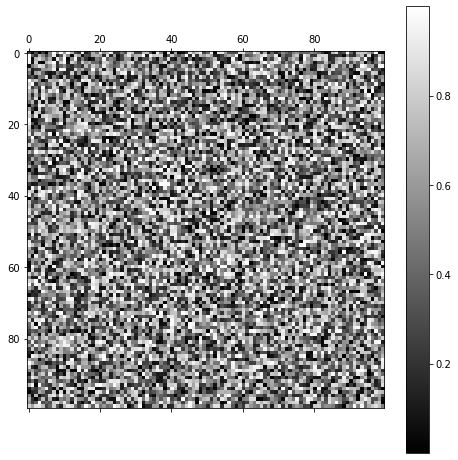

In [37]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

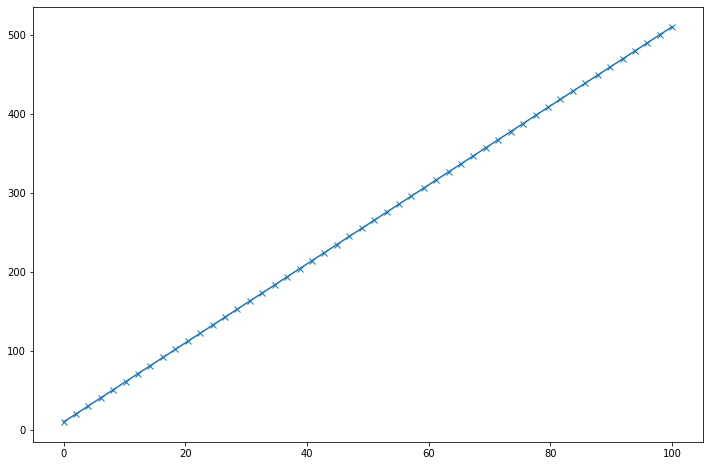

In [38]:
x = np.linspace(0, 100)
y = x * 5 + 10

plt.plot(x, y, 'x-')

# Basic Regression with a linear model

x is 1-dimensional

X: (50, 1), Weights: (1, 1), Bias: (1,), y: (50, 1)


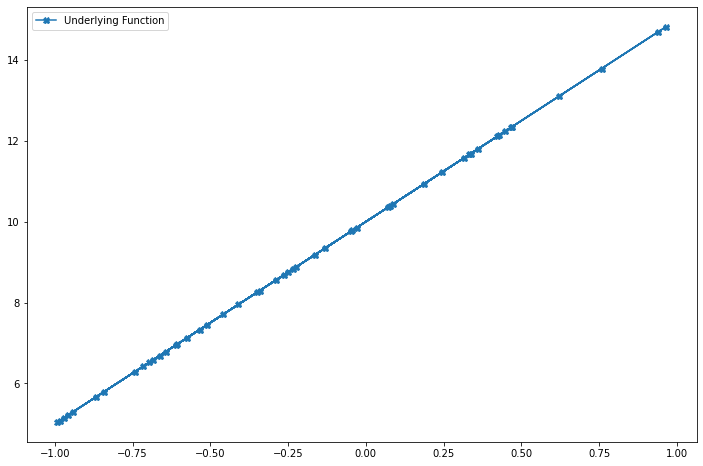

In [39]:
n = 50

d = 1
X = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5], ])
bias_true = np.array([10])

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, Weights: {weights_true.shape}, Bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(X, y_true, marker='X', label="Underlying Function")
plt.legend()

## Basic Prediction function: Linear

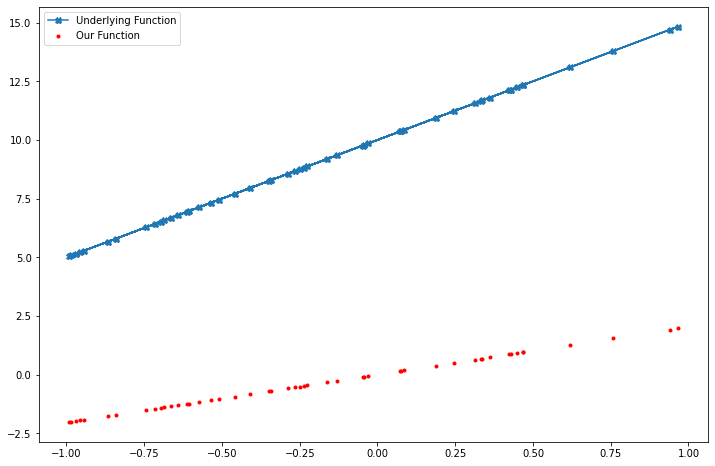

In [41]:
# Initailizing our predictions


class Linear:
    def __init__(self, num_input, num_output=1):
        # The initialization is important to properly deal with different input
        # sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))

    def __call__(self, X):
        return X @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(X)
plt.plot(X, y_true, marker="X", label="Underlying Function")
plt.scatter(X, y_pred, color='r', marker='.', label="Our Function")
plt.legend()

## Basic Loss Function: MSE

In [43]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use the Mean Squared Error (MSE), as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 91.85735778479949
